# This notebook draw some visualizations of the dataset focusing on the distribution of flight delay as it is the target feature

## Importing the need packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

## Importing the dataset

In [3]:
# Get the current script's directory
current_script_dir = os.getcwd()

# Move up to the parent directory
parent_dir = os.path.dirname(current_script_dir)

# Define the sibling data directory name
data_dir = os.path.join(parent_dir, 'data')

# Use os.path.join to create the full file path
dataset_filename = "prosessed_dataset_2022.csv"
file_path = os.path.join(data_dir, dataset_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,FLIGHTS,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,1,6,9E,20363,N138EV,4732,10135,30135,42,23,11433,31295,26,43,1015,1000-1059,1209,1200-1259,114,425,2,1,-1,0,0,-1,0,0,0,0,0
1,1,1,1,6,9E,20363,N138EV,5430,11433,31295,26,43,10135,30135,42,23,1422,1400-1459,1548,1500-1559,86,425,2,1,-3,0,0,-1,0,0,0,0,0
2,1,1,1,6,9E,20363,N147PQ,4671,10397,30397,13,34,14783,34783,29,64,2057,2000-2059,2149,2100-2159,112,563,3,1,-5,0,0,-1,0,0,0,0,0
3,1,1,1,6,9E,20363,N147PQ,5009,13487,31650,27,63,11423,31423,19,61,1041,1000-1059,1153,1100-1159,72,232,1,1,-3,0,0,-1,0,0,0,0,0
4,1,1,1,6,9E,20363,N147PQ,5083,11423,31423,19,61,10397,30397,13,34,1300,1300-1359,1610,1600-1659,130,743,3,1,-3,0,0,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6551768,4,12,31,6,YX,20452,N882RW,5741,12953,31703,36,22,11066,31066,39,44,830,0800-0859,1038,1000-1059,128,479,2,1,-7,0,0,-1,0,0,0,0,0
6551769,4,12,31,6,YX,20452,N979RP,3607,14321,34321,23,12,13930,30977,17,41,635,0600-0659,758,0700-0759,143,900,4,1,-7,0,0,-1,0,0,25,0,0
6551770,4,12,31,6,YX,20452,N979RP,3686,13930,30977,17,41,14321,34321,23,12,1800,1800-1859,2129,2100-2159,149,900,4,1,-7,0,0,-1,0,0,0,0,0
6551771,4,12,31,6,YX,20452,N979RP,3699,11003,31003,19,61,13930,30977,17,41,1508,1500-1559,1627,1600-1659,79,196,1,1,-10,0,0,-1,0,0,0,0,0


# QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK
- Make histogram plot that shows the distribution of DEP_DELAY across the categories of features above

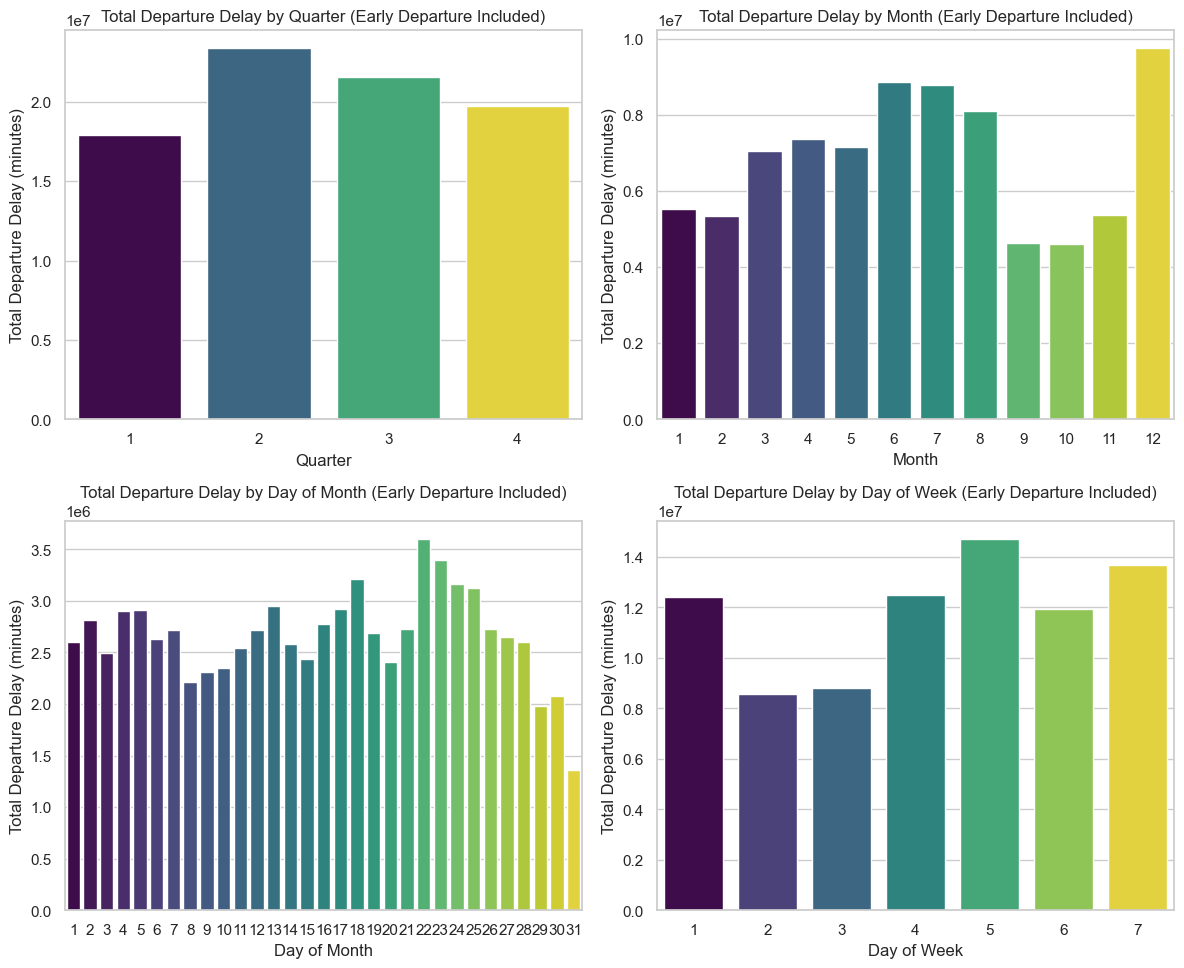

In [4]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Group by QUARTER and sum DEP_DELAY
quarterly_delay = df.groupby('QUARTER')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across quaters (Top Left Plot)
sns.barplot(data=quarterly_delay, x='QUARTER', y='DEP_DELAY', hue='QUARTER', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Total Departure Delay by Quarter (Early Departure Included)')
axs[0, 0].set_xlabel('Quarter')
axs[0, 0].set_ylabel('Total Departure Delay (minutes)')
axs[0, 0].legend().set_visible(False)  # Disable the legend

# Group by MONTH and sum DEP_DELAY
monthly_delay = df.groupby('MONTH')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across months (Top Right Plot)
sns.barplot(data=monthly_delay, x='MONTH', y='DEP_DELAY', hue='MONTH', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Total Departure Delay by Month (Early Departure Included)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Departure Delay (minutes)')
axs[0, 1].legend().set_visible(False)  # Disable the legend

# Group by DAY_OF_MONTH and sum DEP_DELAY
month_day_delay = df.groupby('DAY_OF_MONTH')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across day of month (Bottom Left Plot)
sns.barplot(data=month_day_delay, x='DAY_OF_MONTH', y='DEP_DELAY', hue='DAY_OF_MONTH', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Total Departure Delay by Day of Month (Early Departure Included)')
axs[1, 0].set_xlabel('Day of Month')
axs[1, 0].set_ylabel('Total Departure Delay (minutes)')
axs[1, 0].legend().set_visible(False)  # Disable the legend

# Group by DAY_OF_WEEK and sum DEP_DELAY
month_daily_delay = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across months (Bottom Right Plot)
sns.barplot(data=month_daily_delay, x='DAY_OF_WEEK', y='DEP_DELAY', hue='DAY_OF_WEEK', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Total Departure Delay by Day of Week (Early Departure Included)')
axs[1, 1].set_xlabel('Day of Week')
axs[1, 1].set_ylabel('Total Departure Delay (minutes)')
axs[1, 1].legend().set_visible(False)  # Disable the legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()